In [1]:
psrname='J0751+1807'

In [2]:
EPTA_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA+INPTA/SPNTA/'+psrname+'/results/'
EINPTA_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [3]:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/media/root1/3PAR/sdandapat/work_dir')
from diff_chain import  Diff_chain_shift

2023-03-26 21:06:15.292880: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-26 21:06:15.343871: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-26 21:06:15.344924: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 21:06:16.095743: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
epta_1=np.loadtxt(EPTA_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_epta=pd.read_csv(EPTA_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
len_epta=len(par_epta)
epta_2=epta_1.T

In [5]:
einpta_1=np.loadtxt(EINPTA_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_einpta=pd.read_csv(EINPTA_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
len_einpta=len(par_einpta)
einpta_2=einpta_1.T

In [6]:
epta_arr=[epta_2[len(par_epta)-2],epta_2[len(par_epta)-1]]

einpta_arr=[einpta_2[len(par_einpta)-2],einpta_2[len(par_einpta)-1]]

In [7]:
par_epta

,0
0,RAJ \alpha
1,DECJ \delta
2,F0 \nu
3,F1 \dot{\nu}
4,DM
...,...
58,EQUAD19
59,EQUAD20
60,EQUAD21
61,DMAmp


In [8]:
names = ['logA','gamma']
labels=['\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

In [9]:
epta=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-1],names=names,labels=labels,label='EPTA')
einpta=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-1],names = names,labels=labels,label='EPTA+INPTA \n'+psrname)

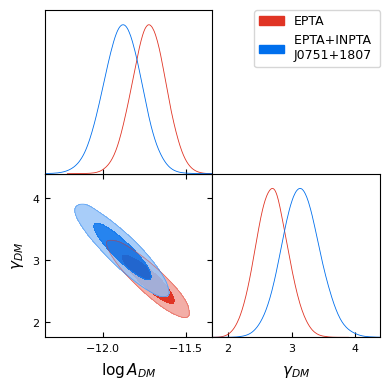

In [10]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta,einpta], filled=True)
plt.savefig(psrname+'_DM_SPNTA.png',dpi=300)

In [11]:
from diff_chain import  Diff_chain_shift

In [12]:
diff_chain, nsig, chi_2, D_B=Diff_chain_shift(epta,einpta)

In [13]:
chi_2

0.5361533759815111

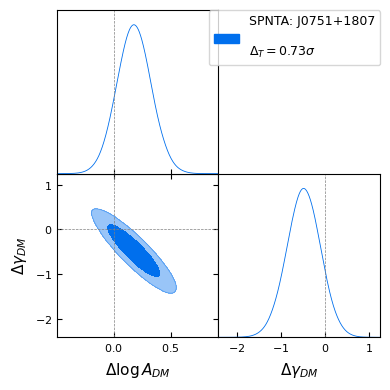

In [14]:
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = ['SPNTA: '+psrname+'\n\n$\Delta_T=$'+
                        str("{:.2f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff.png',dpi=300)